# TP Taux d'apprentissage

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
mu = 100
sigma = 20
n_values = [10**2, 10**3, 10**4]
mu0_values = [0, 50, 100, 150]

## 1. Évolution de la moyenne mobile exponentielle avec αk = 1/k (cas 1) :

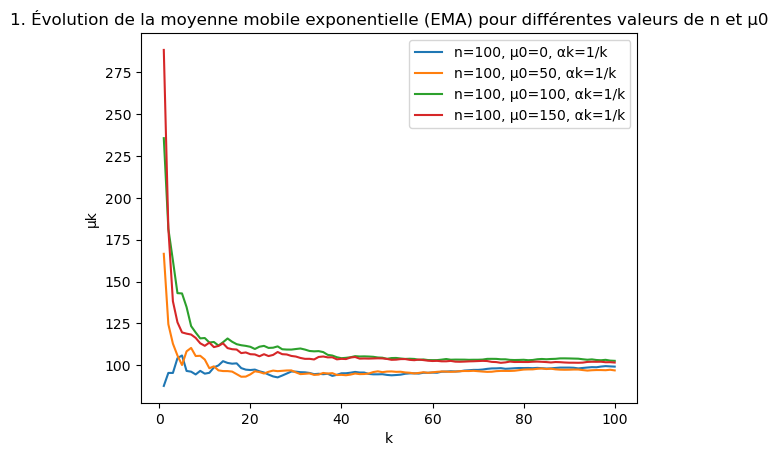

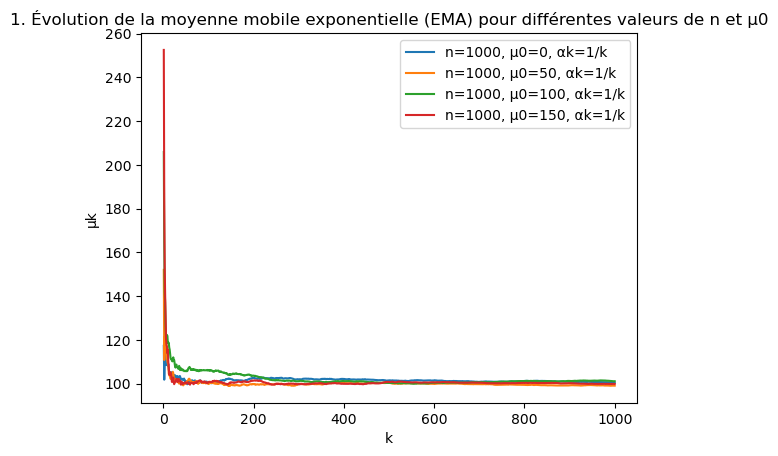

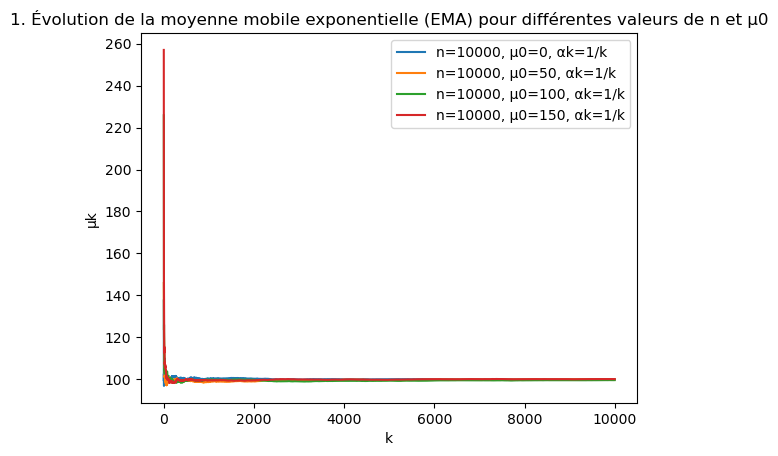

In [2]:
# Fonction pour calculer l'EMA avec αk = 1/k
def calculate_ema_1(X, n):
    mu_values = [X[0]]
    for k in range(2, n + 1):
        alpha = 1 / k
        mu_k = alpha * X[k - 1] + (1 - alpha) * mu_values[k - 2]
        mu_values.append(mu_k)
    return mu_values

for n in n_values:
    for mu0 in mu0_values:
        X = np.random.normal(mu, sigma, n)
        X[0] += mu0
        mu_values = calculate_ema_1(X, n)
        plt.plot(range(1, n + 1), mu_values, label=f'n={n}, μ0={mu0}, αk=1/k')

    plt.xlabel('k')
    plt.ylabel('μk')
    plt.legend()
    plt.title('1. Évolution de la moyenne mobile exponentielle (EMA) pour différentes valeurs de n et μ0')
    plt.show()

**Commentaires**
1. Le taux d'apprentissage diminue à mesure que k augmente.
2. une décroissance régulière de la moyenne mobile à mesure que k augmente.

## 2. Évolution de la moyenne mobile exponentielle avec α constant (cas 2) :

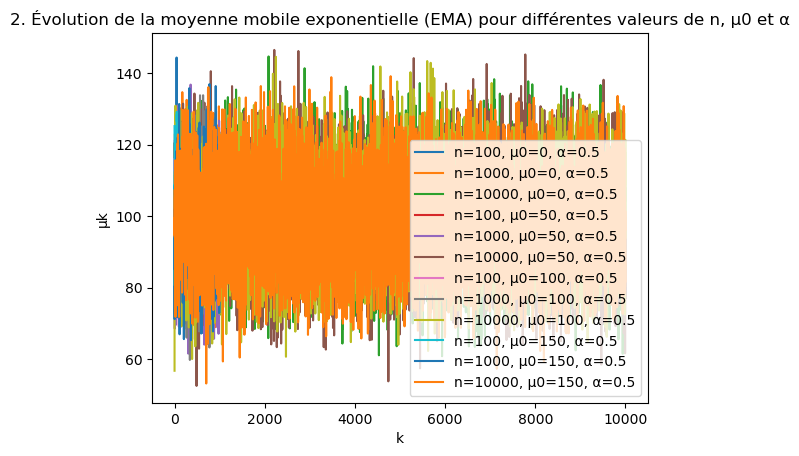

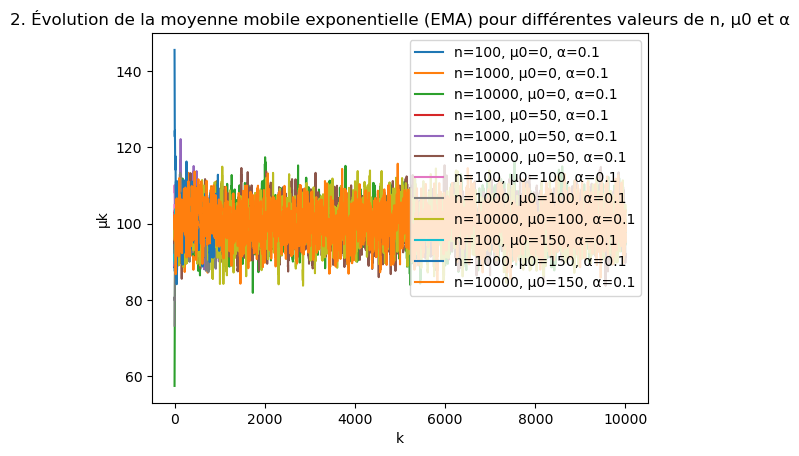

In [9]:
alphas = [1, 0.5, 0.1]

# Fonction pour calculer l'EMA avec αk = α
def calculate_ema_2(alpha, X, n):
    mu_values = [X[0]]
    for k in range(1, n):
        mu_k = alpha * X[k] + (1 - alpha) * mu_values[k - 1]
        mu_values.append(mu_k)
    return mu_values

for alpha in alphas:
    for mu0 in mu0_values:
        for n in n_values:
            X = np.random.normal(mu, sigma, n)
            mu_values = calculate_ema_2(alpha, X, n)
            plt.plot(range(1, n + 1), mu_values, label=f'n={n}, μ0={mu0}, α={alpha}')
    plt.xlabel('k')
    plt.ylabel('μk')
    plt.legend()
    plt.title('2. Évolution de la moyenne mobile exponentielle (EMA) pour différentes valeurs de n, μ0 et α')
    plt.show()

**Commentaires**
1. Lorsque α est plus élevé (par exemple, α = 1), la moyenne mobile réagit rapidement aux fluctuations des données, ce qui peut entraîner une variabilité plus importante.
2. Lorsque α est plus faible (par exemple, α = 0.1), la moyenne mobile est plus lissée, ce qui réduit la variabilité mais peut retarder la réaction aux changements dans les données.

## 3. Évolution de la moyenne mobile exponentielle avec αk = 1/k^a (cas 3) :

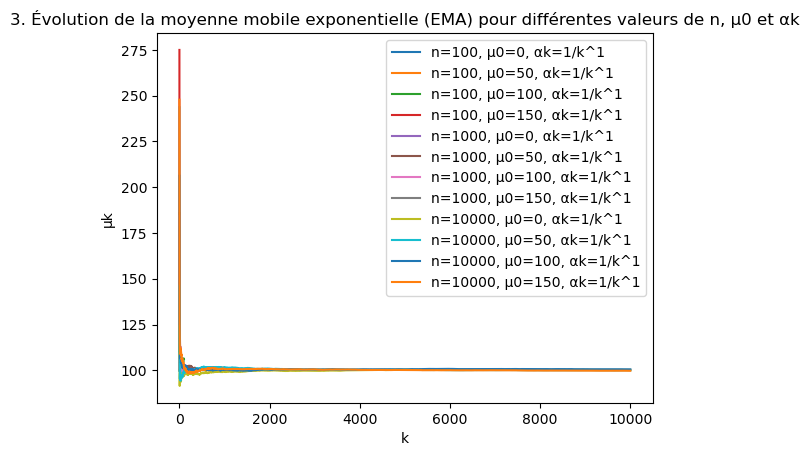

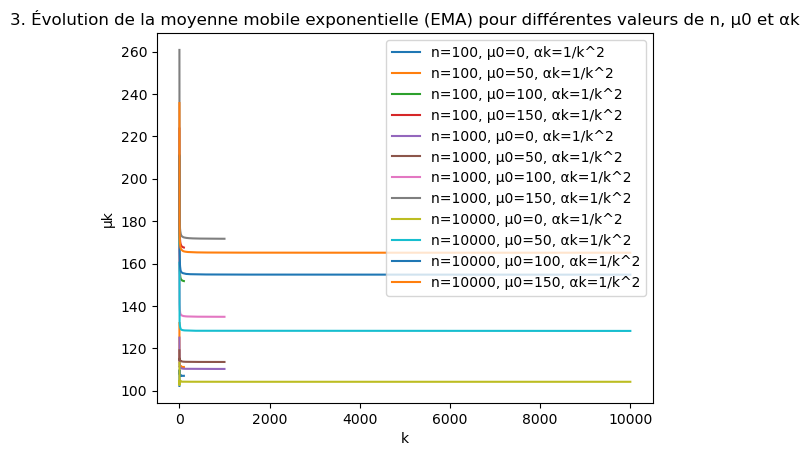

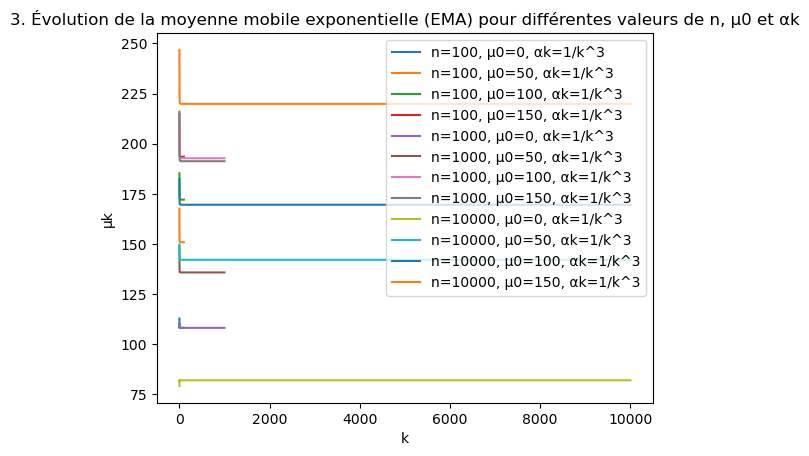

In [8]:
a_values = [1, 2, 3]

# Fonction pour calculer l'EMA avec αk = 1/k^a
def calculate_ema_3(X, n, a):
    mu_values = [X[0]]
    for k in range(2, n + 1):
        alpha = 1 / (k ** a)
        mu_k = alpha * X[k - 1] + (1 - alpha) * mu_values[k - 2]
        mu_values.append(mu_k)
    return mu_values

for a in a_values:
    for n in n_values:
        for mu0 in mu0_values:
            X = np.random.normal(mu, sigma, n)
            X[0] += mu0
            mu_values = calculate_ema_3(X, n, a)
            plt.plot(range(1, n + 1), mu_values, label=f'n={n}, μ0={mu0}, αk=1/k^{a}')

    plt.xlabel('k')
    plt.ylabel('μk')
    plt.legend()
    plt.title('3. Évolution de la moyenne mobile exponentielle (EMA) pour différentes valeurs de n, μ0 et αk')
    plt.show()


**Commentaires**
1. Plus "a" est élevé, plus le taux d'apprentissage diminue rapidement.
2. Lorsque "a" est plus faible (par exemple, a = 1), αk décroît plus lentement, ce qui donne plus de poids aux observations antérieures.
3. Lorsque "a" est plus élevé (par exemple, a = 3), αk diminue rapidement, ce qui accorde plus d'importance aux observations récentes.